In [1]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

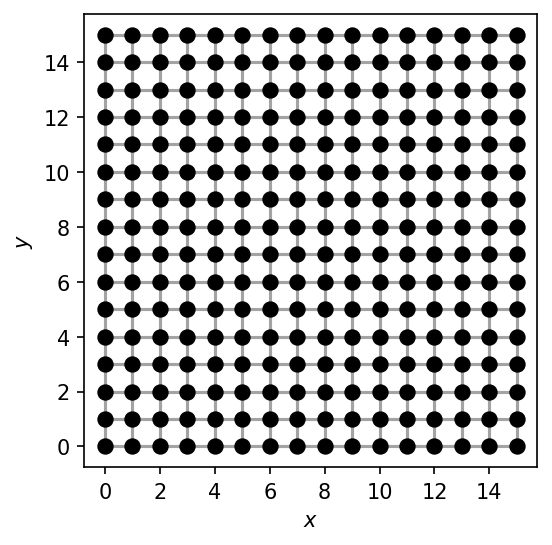

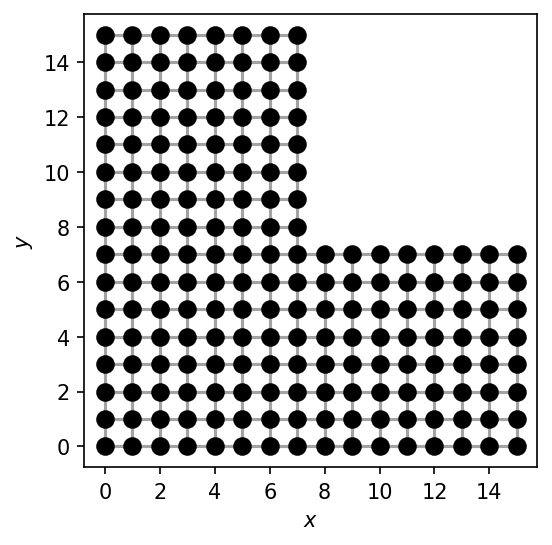

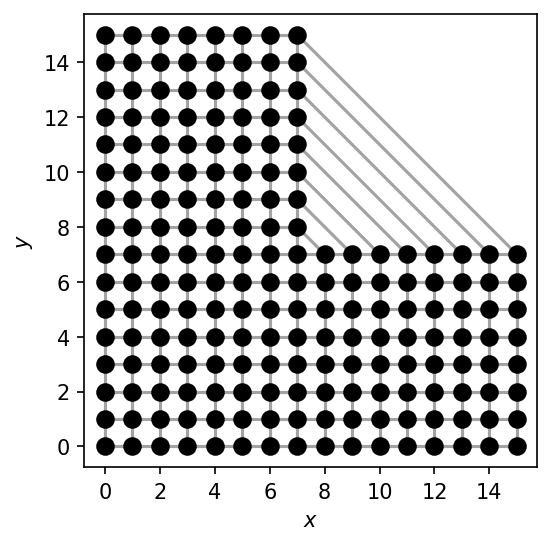

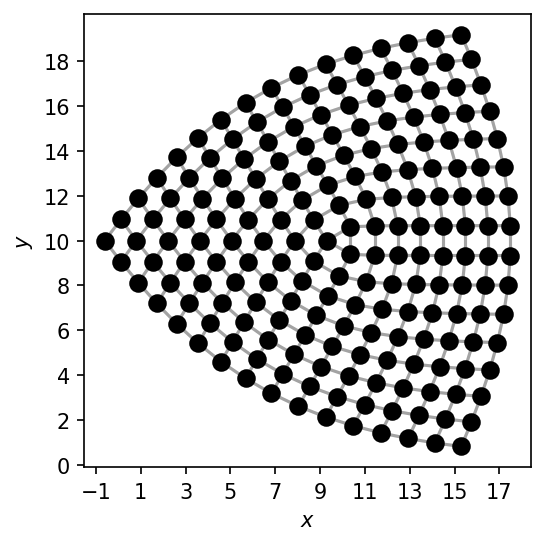

In [2]:
phase_geom = 1j
phase_vortex = -1
codim = 1

N = 16
lattice = SquareLattice(N, "open")
lattice.plot()
plt.savefig("./plots/volterra_process/1.svg")

lattice.remove_sites(
    [(i * N + j) for i in range(N // 2) for j in range(N // 2 + N % 2, N)]
)
lattice.plot()
plt.savefig("./plots/volterra_process/2.svg")

flagged_bonds_geom = lattice.glue_bond(
    [(N // 2 + N % 2) ** 2 + N // (1 + N % 2) - (i + 1) for i in range(N // 2)],
    [i * (N // 2 + N % 2) + (N // 2 + N % 2) - 1 for i in range(N // 2)],
    (3, 1),
    codim=codim,
)
lattice.plot()
plt.savefig("./plots/volterra_process/3.svg")

flagged_bonds_vortex = flagged_bonds_geom

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()
num_sites = lattice.get_num_sites()


def transform(pos):
    defect_pos = ((N - 1) / 2, (N - 1) / 2)
    pos = np.array([pos[0], pos[1]])
    defect_pos = np.array([defect_pos[0], defect_pos[1]])
    pos_shift = pos - defect_pos
    x, y = pos_shift
    r = scipy.linalg.norm(pos_shift)
    angle = np.arctan2(-y, x)
    if angle < 0.0:
        angle = 2 * np.pi + angle
    angle = angle * 4 / 3
    return r * np.array([np.cos(angle), -np.sin(angle)]) + 4 / 3 * defect_pos


for itr in range(lattice.get_num_sites()):
    lattice.move_site(itr, transform(lattice._sites[itr]))

lattice.plot()
plt.savefig("./plots/volterra_process/4.svg")